### About Dataset

Customer churn is when a company’s customers stop doing business with that company. 
Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. 
Existing customers will often have a higher volume of service consumption and can generate additional customer referrals. 
Customer retention can be achieved with good customer service and products. 
But the most effective way for a company to prevent attrition of customers is to truly know them. 
The vast volumes of data collected about customers can be used to build churn prediction models. 
Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

our aimm is to build the model that predicts whether customer leaves the company or not


##### Importing Libraries

In [65]:
import pandas as pd
import numpy as np

##### Loading the data

In [66]:
df=pd.read_csv("customer_churn_analysis.csv")

##### Basic Insights of the data

In [67]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [68]:
# checking the dimension of the dataset
df.shape

(7043, 21)

In [69]:
# checking column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [70]:
# checking the datatypes of columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [71]:
df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
212.3       1
4391.25     1
3956.7      1
7240.65     1
1622.45     1
Name: TotalCharges, Length: 6531, dtype: int64

you can observe there is an empty space which stops the total charges to be float

In [72]:
df.loc[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [73]:
#there are 11 such columns

df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)


In [74]:
# coverting total_charges from object to float
df['TotalCharges']=df['TotalCharges'].astype(float)

In [75]:
# filling null values with mean of TotalCharges
df['TotalCharges']=df['TotalCharges'].fillna(np.mean(df['TotalCharges']))

In [76]:
# checking columns 
df['customerID'].value_counts()

5655-JSMZM    1
8849-GYOKR    1
5124-EOGYE    1
1963-SVUCV    1
6265-SXWBU    1
             ..
6061-GWWAV    1
1342-JPNKI    1
2293-IJWPS    1
0594-UFTUL    1
5788-YPOEG    1
Name: customerID, Length: 7043, dtype: int64

In [77]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [78]:
df['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [79]:
df['TotalCharges'].value_counts()

20.200000      11
2283.300441    11
19.750000       9
19.900000       8
19.650000       8
               ..
1066.150000     1
249.950000      1
8333.950000     1
7171.700000     1
1024.000000     1
Name: TotalCharges, Length: 6531, dtype: int64

In [80]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Identifying and Handling missing values

In [81]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values in the dataset

### Visualizing the Null Values

<AxesSubplot:>

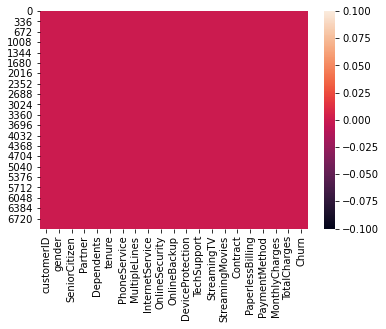

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull())

### Visualizing dataset

Male      3555
Female    3488
Name: gender, dtype: int64

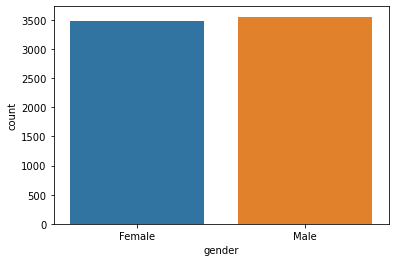

In [83]:
import warnings
warnings.filterwarnings('ignore')

sns.countplot(x=df['gender'])
df['gender'].value_counts()

There are 3555 males and 3488 females 

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

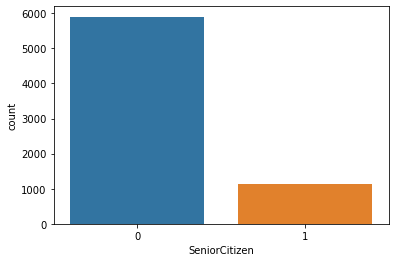

In [84]:
sns.countplot(x=df['SeniorCitizen'])
df['SeniorCitizen'].value_counts()

There are 5901 younger citizen and 1142 senior citizen

No     3641
Yes    3402
Name: Partner, dtype: int64

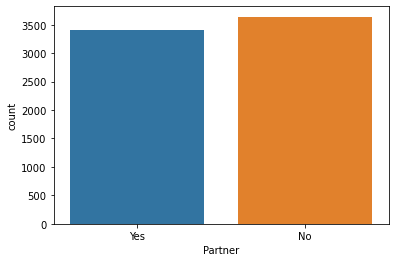

In [85]:
sns.countplot(x=df['Partner'])
df['Partner'].value_counts()

as observed from the graphs there are 3641 people with partner and 3402 people with partner

No     4933
Yes    2110
Name: Dependents, dtype: int64

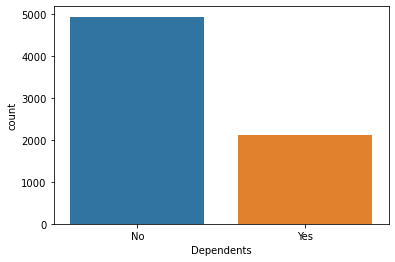

In [86]:
sns.countplot(x=df['Dependents'])
df['Dependents'].value_counts()

4933 people are dependent customers and 2110 people are independent customers

Yes    6361
No      682
Name: PhoneService, dtype: int64

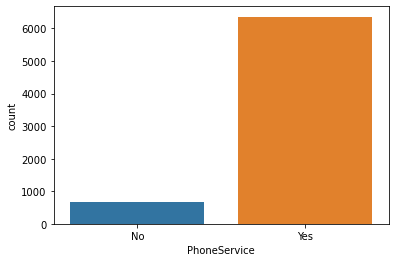

In [87]:
sns.countplot(x=df['PhoneService'])
df['PhoneService'].value_counts()

6361 customers use Phone service, and 682 customers do not use phone service

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

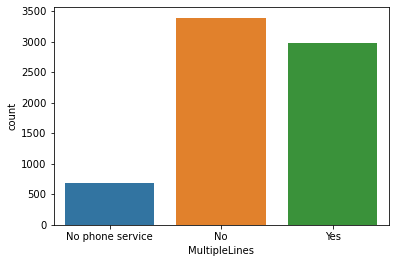

In [88]:
sns.countplot(x=df['MultipleLines'])
df['MultipleLines'].value_counts()

3390 customers use Multiple Lines and 2971 customers do not use multiple Lines and 682 have no phone service

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

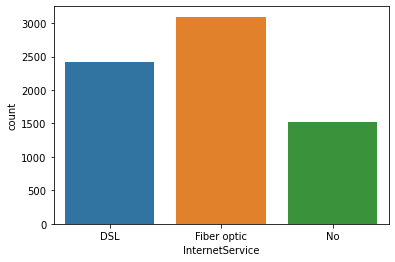

In [89]:
sns.countplot(x=df['InternetService'])
df['InternetService'].value_counts()

3096 customer use fiber optic , 2421 customer uses DSL and 1526 customer do not use Interner Service

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

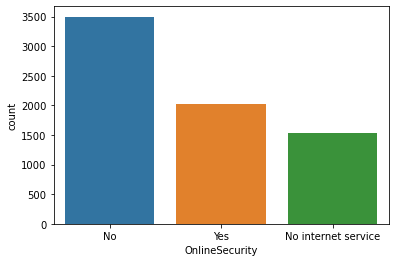

In [90]:
sns.countplot(x=df['OnlineSecurity'])
df['OnlineSecurity'].value_counts()

3498 customer uses no OnlineSecurity , 2019 customer uses Online Security and 1526 uses No Internet Service

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

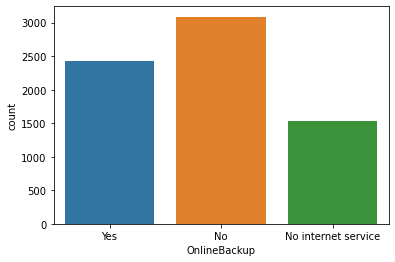

In [91]:
sns.countplot(x=df['OnlineBackup'])
df['OnlineBackup'].value_counts()

3088 customer uses no Online Backup. 2429 customer uses Online Backup, and 1526 have no internet service

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

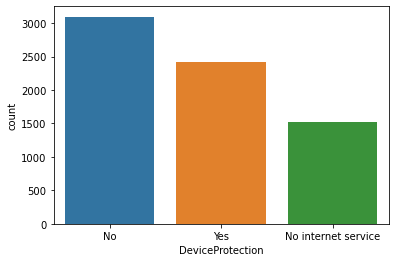

In [92]:
sns.countplot(x=df['DeviceProtection'])
df['DeviceProtection'].value_counts()

3095 customer do not have Device Protection , 2422 have Device Protection and 1526 do not use Internet Service

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

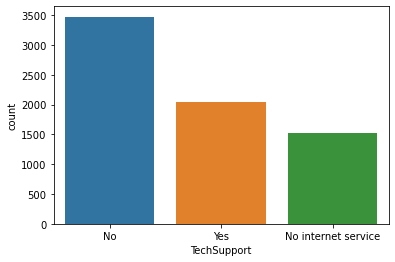

In [93]:
sns.countplot(x=df['TechSupport'])
df['TechSupport'].value_counts()

3473 people do not have Tech support, 2044 customer use Tech support and 1526 customer do not use internet service

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

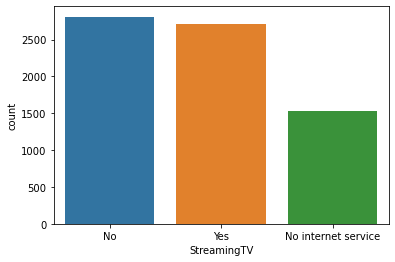

In [94]:
sns.countplot(x=df['StreamingTV'])
df['StreamingTV'].value_counts()

2810 customer have NO StreamingTV, 2707 customer have  StreamingTV, and 1526 hav no internet service

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

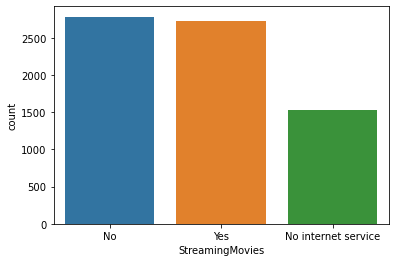

In [95]:
sns.countplot(x=df['StreamingMovies'])
df['StreamingMovies'].value_counts()

2785 customer do not watch  streaming Movies, 2732 customer watch streaming Movies and 1526 do not have internet service

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

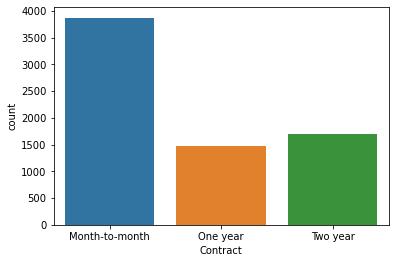

In [96]:
sns.countplot(x=df['Contract'])
df['Contract'].value_counts()

3875 customers have month to month contract, 1695 customer have two year contract, and 1473 customer have two year contract

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

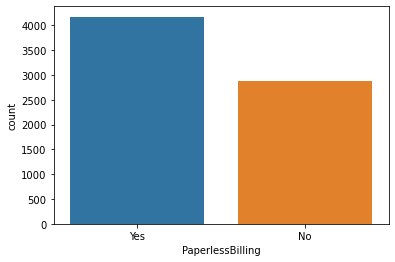

In [97]:
sns.countplot(x=df['PaperlessBilling'])
df['PaperlessBilling'].value_counts()

4171 customer have paperlessBilling and 2871 customer have no paperBilling

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

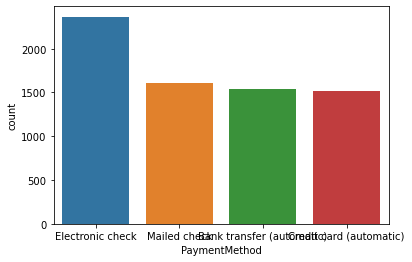

In [98]:
sns.countplot(x=df['PaymentMethod'])
df['PaymentMethod'].value_counts()

2365 Customers made payment through electronic cheque , 1612 have mailed the cheque, 1544 customers made bank transfer, and 1522 customers did credit card payment

No     5174
Yes    1869
Name: Churn, dtype: int64

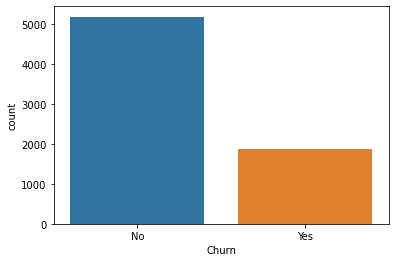

In [99]:
sns.countplot(x=df['Churn'])
df['Churn'].value_counts()

more than 5000 customers have not left the company and 1869 people have left the company

<AxesSubplot:ylabel='Frequency'>

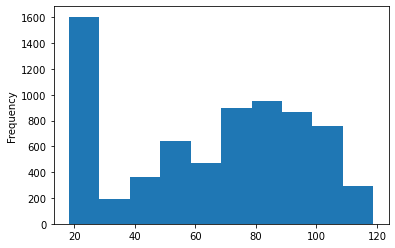

In [100]:
df['MonthlyCharges'].plot.hist()

more than 1600 people pay monthly charges of 20 to 40, and 200 customer pay monthly charges between 110 to 120

<AxesSubplot:ylabel='Frequency'>

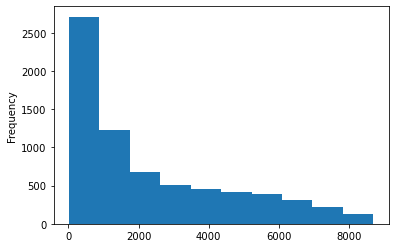

In [101]:
df['TotalCharges'].plot.hist()

more than 2500 customers are charged betweenn 0 to 10000 and more than 1200 customers are charged between 10000 to 20000 and so on
highest charges charged by company are upto 80000

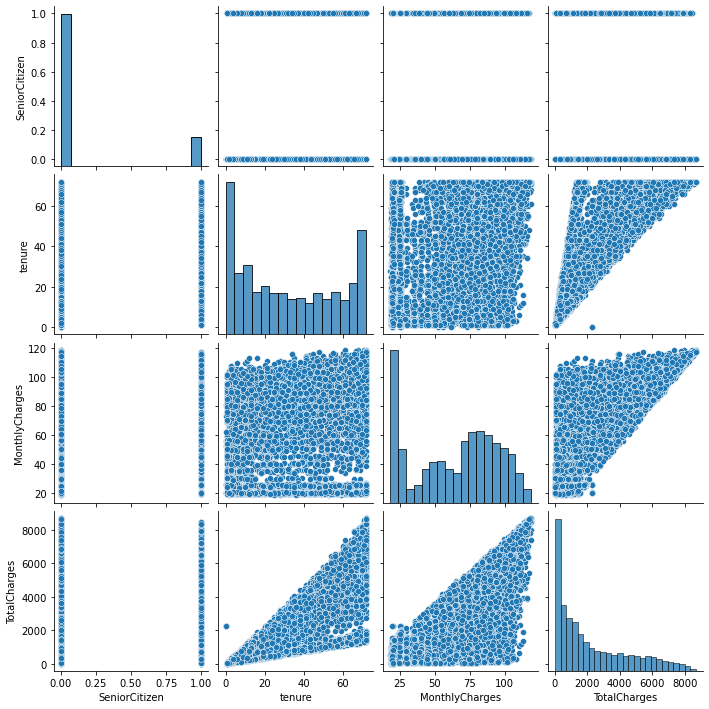

In [102]:
sns.pairplot(df)

more than 2500 customer have total charges of 0 to 2000 and so on

In [103]:
df.describe(include= 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,5655-JSMZM,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2265.000258,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,402.225000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1400.550000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


Note : The columns that are of Object datatype are showing ttheir mean, std, min, 25%, 50%, 75% and max as NaN
    
observation :
    
1)the customer_id is unique for all the columns, 

2) gender is having 2 unique values and frequency of male is more

3)In MonthlyCharges and TotalCharges the difference between 75 % and max is significant it means outliers are present

4) The standard deviation in TotalCharges is quite high showing the high spread of the data.

5) The standard deviation in Monthly charges and Tenure is low it means data is not widely spread



### label encoding

In [104]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [105]:
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

In [106]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0


## Checking Correlation

Correlation is a statistical metric for measuring to what extent  different variables are Interdependent .

In another word, if one variable changes how it affects the change in another variable

In [107]:
dfcor=df.corr()

<AxesSubplot:>

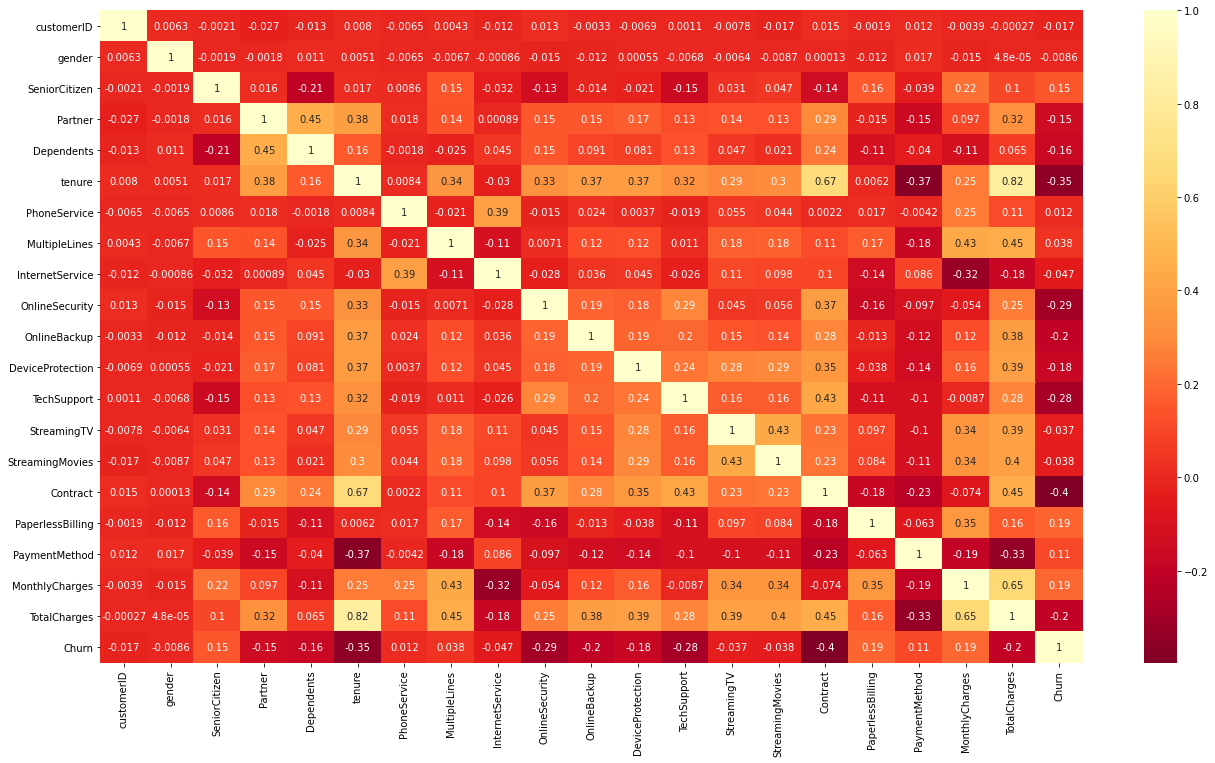

In [108]:
plt.figure(figsize=(22,12))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

1) contract , Tenure, Online_Security , Tech_support are highly negatively correlated with the churn,

2) tenure is positively correlated with contract 

3) total charges are positively correlated with contract.

## Checking Outliers
Outliers are the values that fall really outside the range of the data, and it is checked through two methods zscore and IQR

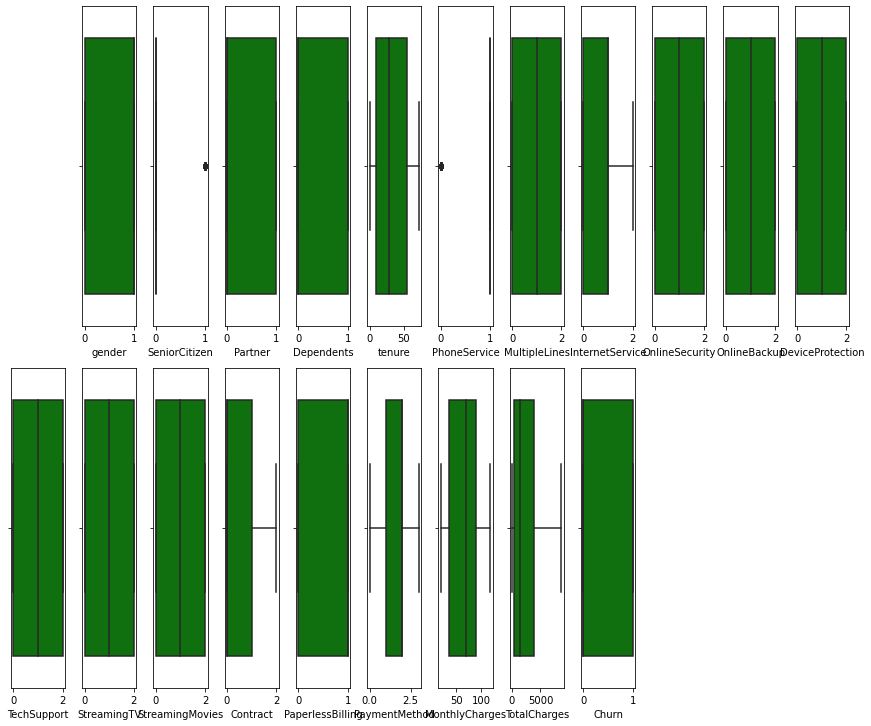

In [109]:
collist=df.columns.values
ncol=12
nrows=12


plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='h')
    plt.tight_layout()

1) senior_citizen and phone service is showing outliers,

2) the remaining columns like gender , gender, Partner, Dependents,
       tenure, PhoneService, MultipleLines, 
       OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport,
       StreamingTV, StreamingMovies, PaperlessBilling,
        Churn. are all columns converted from category to numerical that's why it is showing as completely filled
        
3)the tenure, contract, monthly_Charges, total _charges are having no outliers

##### checking zscore statistiaclly

In [110]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [111]:
threshold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [112]:
df_new= df[(z<3).all(axis=1)]

In [113]:
df_new.shape , df.shape

((6361, 21), (7043, 21))

In [114]:
data_loss = ((7043-6361)/7043)* 100

In [115]:
data_loss

9.683373562402386

there is a data_loss of 9.6 percent which is high hence we cannot remove outliers, besides the zscore is pointing only on single column
for the outlier

## Checking skewness

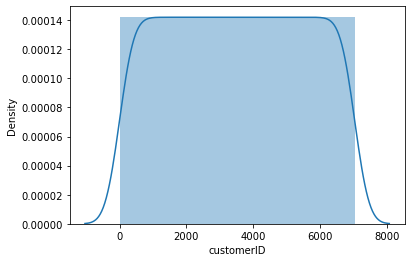

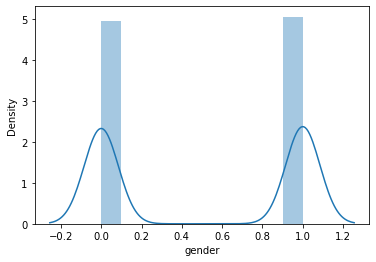

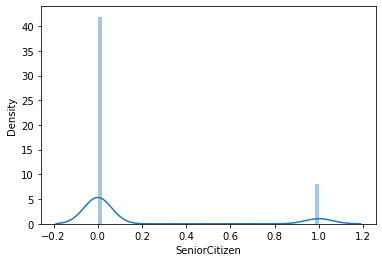

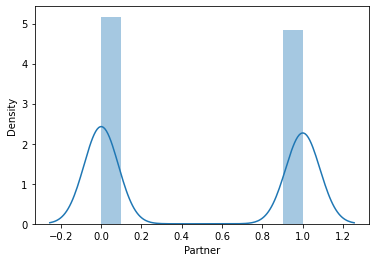

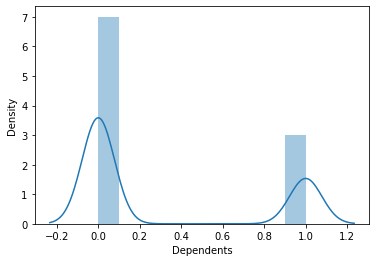

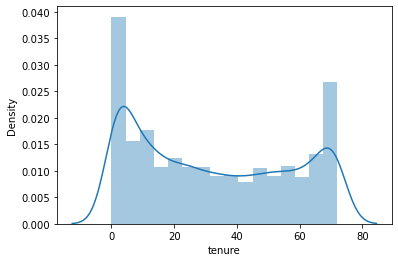

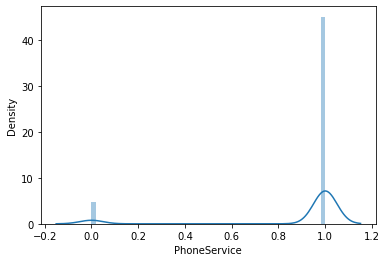

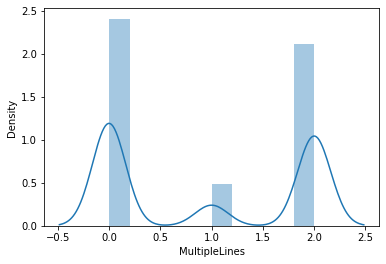

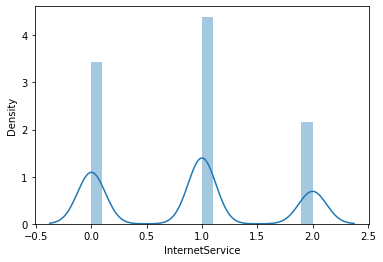

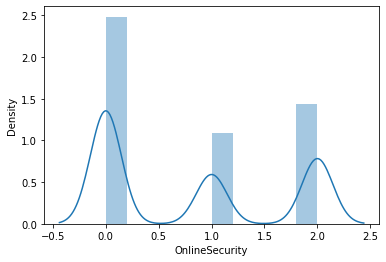

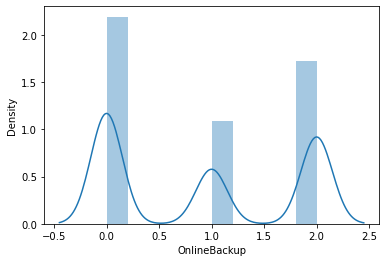

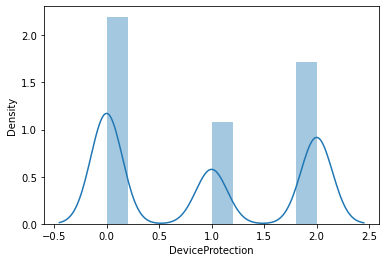

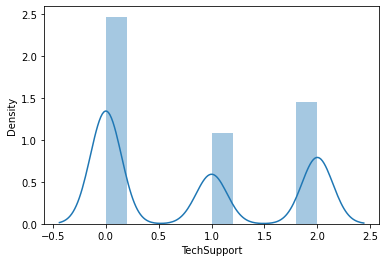

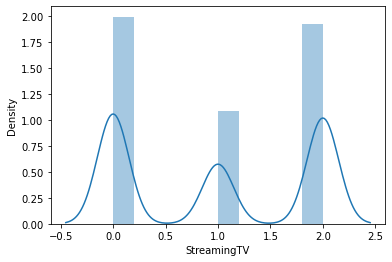

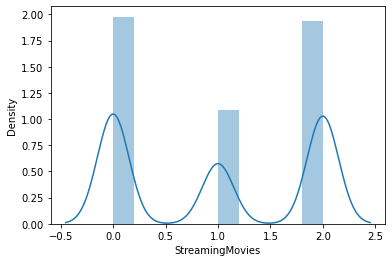

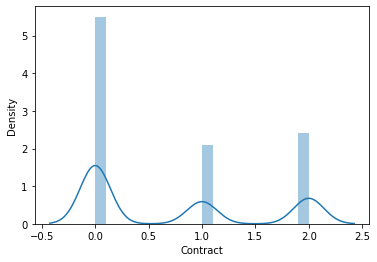

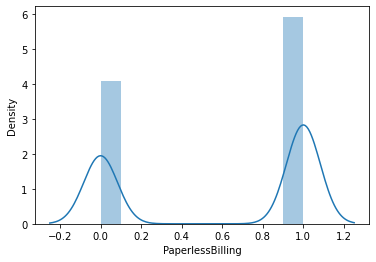

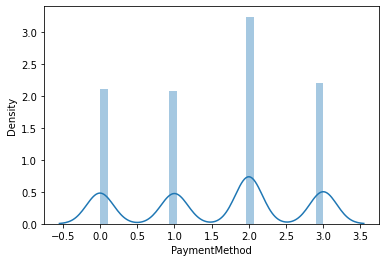

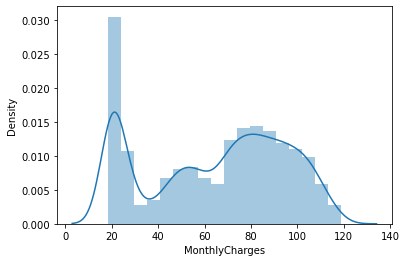

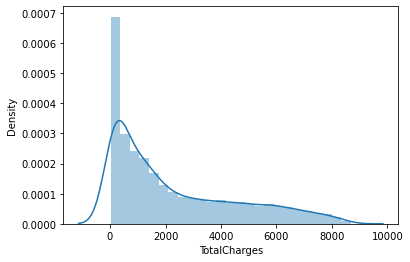

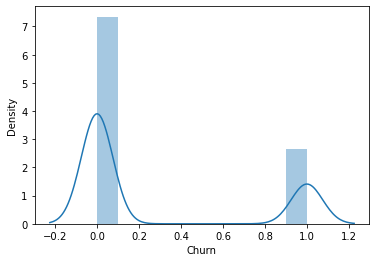

In [116]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

###### Visually it can observed that many columns are converted from categorical data to numerical so the distribution is such in distplots and it may shows skewness , but there is no such skewness observed

In [117]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

as in very few columns skew score is more than 0.5 % and that are all the categorical converted numerical columns

### separating the data into x and y

In [118]:
x=df.iloc[:,:-1]
x.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65


### Standard Scaler
As in many columns the range is totally diffenet , the data is not on the same scale so to amke model properly learn it is essential to 
bring the training data on the same scale so applying StandardScaler

In [119]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_new =scale.fit_transform(x)
x_new

array([[ 0.91189045, -1.00955867, -0.43991649, ...,  0.39855772,
        -1.16032292, -0.99497138],
       [ 0.21690598,  0.99053183, -0.43991649, ...,  1.33486261,
        -0.25962894, -0.17387565],
       [-0.47070074,  0.99053183, -0.43991649, ...,  1.33486261,
        -0.36266036, -0.96039939],
       ...,
       [-0.07574495, -1.00955867, -0.43991649, ...,  0.39855772,
        -1.1686319 , -0.85518222],
       [ 1.18683477,  0.99053183,  2.27315869, ...,  1.33486261,
         0.32033821, -0.87277729],
       [-0.63694614,  0.99053183, -0.43991649, ..., -1.47405205,
         1.35896134,  2.01391739]])

In [120]:
x=x_new

In [121]:
y=df.iloc[:,-1]
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Churn, dtype: float64

### Training model

In [122]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score , classification_report, confusion_matrix

## Finding the best random state  and training the LogisticRegression Model

In [123]:
maxaccuracy = 0
best_random_state = 0

for i in range(1,1000):
    x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    predlg=lg.predict(x_test)
    accuracy=accuracy_score(y_test,predlg)
    if accuracy > maxaccuracy:
        maxaccuracy = accuracy
        best_random_state =i
print(f"maximum accuracy  is :  {maxaccuracy} and best random stateis {best_random_state}")

maximum accuracy  is :  0.8303225806451613 and best random stateis 940


the best random state is rcorded at 940 with the accuracy score of 83 %

In [124]:
from sklearn.linear_model import LogisticRegression

x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=940)
lg = LogisticRegression()
lg.fit(x_train,y_train)
predlg = lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))


0.8303225806451613
[[1057  102]
 [ 161  230]]
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      1159
         1.0       0.69      0.59      0.64       391

    accuracy                           0.83      1550
   macro avg       0.78      0.75      0.76      1550
weighted avg       0.82      0.83      0.83      1550



##### Logistic Regression is giving the accuracy score of 83 %

## Finding the best random state  and training the DecisionTreeClassifier Model

In [125]:
from sklearn.tree import DecisionTreeClassifier


maxaccuracy = 0
best_random_state = 0

for i in range(1,1000):
    x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    preddtc=dtc.predict(x_test)
    accuracy=accuracy_score(y_test,preddtc)
    if accuracy > maxaccuracy:
        maxaccuracy = accuracy
        best_random_state =i
print(f"maximum accuracy  is :  {maxaccuracy} and best random state is {best_random_state}")

maximum accuracy  is :  0.76 and best random state is 595


In [126]:
from sklearn.tree import DecisionTreeClassifier

x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=785)
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc = dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))


0.752258064516129
[[961 208]
 [176 205]]
              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83      1169
         1.0       0.50      0.54      0.52       381

    accuracy                           0.75      1550
   macro avg       0.67      0.68      0.67      1550
weighted avg       0.76      0.75      0.76      1550



###### The DecisionTreeClassifier is giving the accuracy_score of 75%

## Finding the best random state  and training the RandomForestClassifier Model

In [127]:
from sklearn.ensemble import RandomForestClassifier


maxaccuracy = 0
best_random_state = 0

for i in range(1,1000):
    x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    predrfc=rfc.predict(x_test)
    accuracy=accuracy_score(y_test,predrfc)
    #print(f"accuracy is {accuracy} at random_state {i}")
    if accuracy > maxaccuracy:
        maxaccuracy = accuracy
        best_random_state =i
        print(f"accuracy is {maxaccuracy} at random_state of{best_random_state}")
print(f"maximum accuracy  is :  {maxaccuracy} and best random state is {best_random_state}")

accuracy is 0.8058064516129032 at random_state of1
accuracy is 0.8083870967741935 at random_state of10
accuracy is 0.8148387096774193 at random_state of18
accuracy is 0.8251612903225807 at random_state of35
accuracy is 0.8283870967741935 at random_state of230
maximum accuracy  is :  0.8283870967741935 and best random state is 230


In [128]:
x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=230)
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.8206451612903226
[[1079  118]
 [ 160  193]]
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89      1197
         1.0       0.62      0.55      0.58       353

    accuracy                           0.82      1550
   macro avg       0.75      0.72      0.73      1550
weighted avg       0.81      0.82      0.82      1550



###### RandomForestClassifier is giving the accuracy of 82%

## Finding the best random state  and training the SVC Model

In [132]:
from sklearn.svm import SVC


maxaccuracy = 0
best_random_state = 0

for i in range(1,1000):
    x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=i)
    svc=SVC()
    svc.fit(x_train,y_train)
    predsvc=svc.predict(x_test)
    accuracy=accuracy_score(y_test,predsvc)
    #print(f"accuracy is {accuracy} at random_state {i}")
    if accuracy > maxaccuracy:
        maxaccuracy = accuracy
        best_random_state =i
        print(f"accuracy is{maxaccuracy} at random_state of{best_random_state}")
print(f"maximum accuracy  is :  {maxaccuracy} and best random state is {best_random_state}")

accuracy is0.8058064516129032 at random_state of1
accuracy is0.8103225806451613 at random_state of2
accuracy is0.8154838709677419 at random_state of7
accuracy is0.8193548387096774 at random_state of18
accuracy is0.82 at random_state of106
accuracy is0.8212903225806452 at random_state of310
accuracy is0.8225806451612904 at random_state of582
maximum accuracy  is :  0.8225806451612904 and best random state is 582


In [136]:
x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=582)
svc = RandomForestClassifier()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8154838709677419
[[1064  114]
 [ 172  200]]
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1178
         1.0       0.64      0.54      0.58       372

    accuracy                           0.82      1550
   macro avg       0.75      0.72      0.73      1550
weighted avg       0.81      0.82      0.81      1550



###### SVC model is giving accuracy of 81 %

## Cross Validation of All models

sometimes in train-test-split there are chances that model may learn less and also to remove overfitting and underfitting of model so cross-validation of the model is necessary and it can be done using cross_val_score

In [137]:
# checking the cross-validation-score of the logistic model
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lg,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f" At  cross fold {j}  the cv_core is {cv_mean} ")

 At  cross fold 2  the cv_core is 0.800652602596476 
 At  cross fold 3  the cv_core is 0.8027833204736338 
 At  cross fold 4  the cv_core is 0.8040614836611429 
 At  cross fold 5  the cv_core is 0.8032097836957224 
 At  cross fold 6  the cv_core is 0.8025002263206841 
 At  cross fold 7  the cv_core is 0.8039191436710986 
 At  cross fold 8  the cv_core is 0.8037760551026726 
 At  cross fold 9  the cv_core is 0.8033512292510244 


###### cross val score of LogisticRegression is  80.39 %  at cv = 7

In [138]:
# checking the cross-validation-score of the DecisionTreeClassifier model is 
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dtc,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f" At  cross fold {j}  the cv_core is {cv_mean} ")

 At  cross fold 2  the cv_core is 0.7232708639861971 
 At  cross fold 3  the cv_core is 0.7354818467738365 
 At  cross fold 4  the cv_core is 0.725119621470239 
 At  cross fold 5  the cv_core is 0.7320748516033293 
 At  cross fold 6  the cv_core is 0.7258273775895564 
 At  cross fold 7  the cv_core is 0.7265393311855354 
 At  cross fold 8  the cv_core is 0.7238428374264781 
 At  cross fold 9  the cv_core is 0.7280969174091241 


###### cross val score of DecisionTreeClassifier is   73.54%  at cv =  3

In [139]:
# checking the cross-validation-score of the RandomForestClassifier model is
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rfc,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f" At  cross fold {j}  the cv_core is {cv_mean} ")

 At  cross fold 2  the cv_core is 0.7897198217364105 
 At  cross fold 3  the cv_core is 0.7963944813863408 
 At  cross fold 4  the cv_core is 0.7927036549481183 
 At  cross fold 5  the cv_core is 0.7927024525775856 
 At  cross fold 6  the cv_core is 0.7962531703049834 
 At  cross fold 7  the cv_core is 0.793553334553609 
 At  cross fold 8  the cv_core is 0.7936959872562172 
 At  cross fold 9  the cv_core is 0.7971072561032483 


###### cross val score of RandomForestClassifier is   79.71 %  at cv = 9

In [140]:
 #checking the cross-validation-score of the SVC model
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(svc,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f" At  cross fold {j}  the cv_core is {cv_mean} ")

 At  cross fold 2  the cv_core is 0.7904300892140464 
 At  cross fold 3  the cv_core is 0.7975296553382755 
 At  cross fold 4  the cv_core is 0.7944077164317795 
 At  cross fold 5  the cv_core is 0.7917101506548809 
 At  cross fold 6  the cv_core is 0.7922779140542966 
 At  cross fold 7  the cv_core is 0.7963941418872212 
 At  cross fold 8  the cv_core is 0.7941238971726343 
 At  cross fold 9  the cv_core is 0.7917110798268259 


###### cross val score of RandomForestClassifier is 79.63   %  at cv = 7

In [ ]:
# MODEL                                ACCURACY                  CROSS_VAL_SCORE          DIFFERENCE

# LogisticRegression                        83                            80                  3
# DecisionTreeClassifier                    74                            72                  2
# RandomForestClassifier                    82                            79                  3
# SVC                                       81                            79                  3    

###### from  the above table it can be observed that Logistic Regression is best as the difference between Accuracy and Cross_val_score is 3 and it gives the highest accuracy of 83

## Hyper Parameter Tuning 

In [141]:

from sklearn.model_selection import GridSearchCV
 # creating parameter list to pass in GridSearchCV
parameters ={'penalty':['l1', 'l2', 'elasticnet', 'none'],
            'dual' :[True ,False],
             'class_weight': ['dict','balanced']

            }

In [142]:
lggscv=GridSearchCV(LogisticRegression(),parameters,cv=7)

In [143]:
lggscv.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=LogisticRegression(),
             param_grid={'class_weight': ['dict', 'balanced'],
                         'dual': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [144]:
lggscv_pred=lggscv.best_estimator_.predict(x_test)

In [145]:
accuracy_score(y_test,lggscv_pred)

0.8174193548387096

### Exporting model

In [146]:
import pickle
filename='customer_churn_analysis_LG.pkl'
pickle.dump(lggscv.best_estimator_,open(filename,'wb'))

In [147]:
loaded_model=pickle.load(open('customer_churn_analysis_LG.pkl','rb'))
result=loaded_model.score(x_test,y_test)

print(result)

0.8174193548387096


In [148]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],lggscv_pred[:]],index=["Predicted","Original"])

In [149]:
conclusion   

,0,1,2,3,4,5,6,7,8,9,...,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549
Predicted,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
Original,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


###### By looking at the predicted and original it can be concluded that our model has learned well